In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
!pip install gensim==4.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 104.9 MB/s eta 0:00:0000:0100:01


In [ ]:
pip install --upgrade gensim scipy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip freeze | grep gensim

gensim==4.2.0


In [ ]:
pip install scipy==1.10.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 38.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4


In [ ]:
!pip freeze | grep scipy

scipy==1.10.1


In [ ]:
!pip install tensorflow

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Input, SimpleRNN, LSTM, Dense, Masking, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


2024-05-13 12:11:16.845311: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-13 12:11:16.964080: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-13 12:11:17.627720: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2024-05-1

In [8]:
X = pd.read_csv("~/code/uk-pol-speech-classifier/notebooks/features_text_1000sample_400min_600cutoff.csv")
y = pd.read_csv("~/code/uk-pol-speech-classifier/notebooks/target_text_1000sample_400min_600cutoff.csv")

In [9]:
X

,text
0,out of parent of eligible twoyearolds have tak...
1,with permission madam speaker i would like to ...
2,do but i know it to some extent because my dut...
3,great debate but it is a debate about economic...
4,should think that i have changed my interest c...
...,...
6995,dokeep inflation lowthere is merit in that in ...
6996,roughly in northern ireland between protestant...
6997,to british act of parliament and the constitut...
6998,make a total commitment to the principle of no...


In [10]:
X.shape

(7000, 1)

In [11]:
y

,party
0,Con
1,Con
2,Con
3,Con
4,Con
...,...
6995,UUP
6996,UUP
6997,UUP
6998,UUP


In [12]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# Initialize list
tokenized_texts = []

# Tokenize each text per row
for text_row in X['text']:
    tokenized_text = text_to_word_sequence(text_row)
    tokenized_texts.append(tokenized_text)


In [13]:
len(tokenized_texts)

7000

In [14]:
X_tokenized = pd.DataFrame({'tokenized_text': tokenized_texts})
X_tokenized = X_tokenized["tokenized_text"]
X_tokenized.shape

(7000,)

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

# Split in train and test set
X_train, X_test, y_train, y_test = train_test_split(X_tokenized, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
import gensim.downloader as api
word2vec_model = api.load("glove-wiki-gigaword-50")

In [21]:
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 42.6 MB/s eta 0:00:0000:01


In [22]:
import nltk
from nltk.corpus import stopwords

# Download English stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
# Function to convert a sentence (list of words) into a matrix representing the words in the embedding space
def embed_sentence_with_TF(word2vec, sentence):
    embedded_sentence = []
    for word in sentence:
        if word not in stop_words and word in word2vec:
            embedded_sentence.append(word2vec[word])

    return np.array(embedded_sentence)

# Function that converts a list of sentences into a list of matrices
def embedding(word2vec, sentences):
    embed = []

    for sentence in sentences:
        embedded_sentence = embed_sentence_with_TF(word2vec, sentence)
        embed.append(embedded_sentence)

    return embed

In [38]:
# Embed the training and test sentences
X_train_embed = embedding(word2vec_model, X_train)
X_test_embed = embedding(word2vec_model, X_test)

In [39]:
X_train_embed

[array([[-0.31905 , -0.09507 , -0.049458, ..., -0.23004 ,  0.081364,
         -0.035147],
        [ 0.33201 , -0.18804 ,  0.078552, ..., -0.46848 ,  0.19546 ,
         -0.50047 ],
        [-0.39874 ,  0.071993, -0.069773, ...,  0.16757 , -0.81659 ,
         -0.12107 ],
        ...,
        [ 0.60137 ,  0.28521 , -0.032038, ..., -1.0278  ,  0.039922,
          0.20018 ],
        [-0.53884 , -0.38573 , -0.91965 , ...,  1.1663  , -0.74244 ,
         -0.060435],
        [-0.38155 ,  0.21448 , -0.33124 , ...,  1.2357  , -0.16794 ,
         -0.069801]], dtype=float32),
 array([[ 0.36544 , -0.15746 , -0.23966 , ...,  0.011441, -1.4997  ,
         -0.39907 ],
        [-0.18153 ,  0.64827 , -0.5821  , ..., -1.3138  ,  0.48764 ,
         -0.10467 ],
        [-0.10274 ,  0.44318 , -0.62913 , ...,  0.23762 , -0.53612 ,
          0.35509 ],
        ...,
        [ 1.0435  ,  0.36095 ,  0.48787 , ...,  1.0334  , -0.094584,
          0.50767 ],
        [-0.18153 ,  0.64827 , -0.5821  , ..., -1.3138  ,

In [40]:
text_lengths = [len(text) for text in X_train_embed]
max_len = max(text_lengths)
max_len

350

In [41]:
# Pad embedded sentences
X_train_pad = pad_sequences(X_train_embed, dtype='float32', padding='post', maxlen=max_len)
X_test_pad = pad_sequences(X_test_embed, dtype='float32', padding='post', maxlen=max_len)

In [42]:
y_train = y_train["party"]
y_test = y_test["party"]

In [43]:
from sklearn.preprocessing import LabelEncoder

# Initialize Label encoder
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [44]:
# One-hot-encode y_train and y_test

from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train_encoded, num_classes=7)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=7)

In [ ]:
# Initialize model and compile
model = Sequential()
model.add(LSTM(units=128))
model.add(Dense(10, activation = "relu"))
model.add(Dense(7, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Define callbacks
# Path for modelCheckpoint
checkpoint_path = 'best_model.keras'
modelCheckpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True)

LRreducer = ReduceLROnPlateau(patience=3, monitor='val_loss', factor=0.1, min_lr=0, verbose=1)

EarlyStopper = EarlyStopping(patience=10, restore_best_weights = True, monitor='val_loss', verbose=1)

In [ ]:
# Fit
history = model.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=30,
    validation_split=0.2,
    callbacks=[EarlyStopper],
    verbose=1
)

Epoch 1/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.1387 - loss: 1.9451 - val_accuracy: 0.1464 - val_loss: 1.9459
Epoch 2/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 134ms/step - accuracy: 0.1512 - loss: 1.9459 - val_accuracy: 0.1411 - val_loss: 1.9465
Epoch 3/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 149ms/step - accuracy: 0.1442 - loss: 1.9445 - val_accuracy: 0.1411 - val_loss: 1.9464
Epoch 4/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 23s 163ms/step - accuracy: 0.1488 - loss: 1.9442 - val_accuracy: 0.1473 - val_loss: 1.9469
Epoch 5/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 23s 161ms/step - accuracy: 0.1533 - loss: 1.9444 - val_accuracy: 0.1473 - val_loss: 1.9486
Epoch 6/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 23s 161ms/step - accuracy: 0.1465 - loss: 1.9445 - val_accuracy: 0.1429 - val_loss: 1.9484
Epoch 7/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 22s 157ms/step - accuracy: 0.1524 - loss: 1.9437 - val_accuracy: 0.1446 - val_loss: 1.9509
Epoch 8/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 22s 159ms/step - accuracy: 0.1502 - loss: 1

In [ ]:
# Initialize model_2 and compile
model_2 = Sequential()
model_2.add(LSTM(units=128, activation = "tanh"))
model_2.add(Dense(30, activation = "relu"))
model_2.add(Dense(10, activation = "relu"))
model_2.add(Dense(7, activation="softmax"))

model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit model_2
history_2 = model_2.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=50,
    validation_split=0.2,
    callbacks=[EarlyStopper],
    verbose=1
)

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 132ms/step - accuracy: 0.1504 - loss: 1.9405 - val_accuracy: 0.1473 - val_loss: 1.9487
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 142ms/step - accuracy: 0.1513 - loss: 1.9441 - val_accuracy: 0.1509 - val_loss: 1.9315
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 22s 160ms/step - accuracy: 0.1602 - loss: 1.9306 - val_accuracy: 0.1661 - val_loss: 1.9239
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 23s 166ms/step - accuracy: 0.1624 - loss: 1.9314 - val_accuracy: 0.1625 - val_loss: 1.9259
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 25s 182ms/step - accuracy: 0.1763 - loss: 1.9251 - val_accuracy: 0.1536 - val_loss: 1.9058
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 24s 171ms/step - accuracy: 0.1822 - loss: 1.9153 - val_accuracy: 0.1321 - val_loss: 1.9482
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 24s 173ms/step - accuracy: 0.1405 - loss: 1.9453 - val_accuracy: 0.2018 - val_loss: 1.9265
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 24s 168ms/step - accuracy: 0.1624 - loss: 1

In [ ]:
history_2.history['accuracy']

[0.15245535969734192,
 0.15468749403953552,
 0.16272321343421936,
 0.16674107313156128,
 0.17812499403953552,
 0.16718749701976776,
 0.14598214626312256,
 0.17343750596046448,
 0.21696428954601288,
 0.24017857015132904]

In [22]:
EarlyStopper = EarlyStopping(patience=10, restore_best_weights = True, monitor='val_accuracy', verbose=1)

In [ ]:
# Fit model_2 with newly defined EarlyStopper
history_2 = model_2.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=50,
    validation_split=0.2,
    callbacks=[EarlyStopper],
    verbose=1
)

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 133ms/step - accuracy: 0.1610 - loss: 1.9348 - val_accuracy: 0.1455 - val_loss: 1.9347
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - accuracy: 0.1632 - loss: 1.9312 - val_accuracy: 0.1732 - val_loss: 1.9287
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 22s 154ms/step - accuracy: 0.1786 - loss: 1.9307 - val_accuracy: 0.1804 - val_loss: 1.9272
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 22s 157ms/step - accuracy: 0.1764 - loss: 1.9297 - val_accuracy: 0.1813 - val_loss: 1.9345
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 22s 160ms/step - accuracy: 0.1815 - loss: 1.9329 - val_accuracy: 0.1813 - val_loss: 1.9306
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 23s 165ms/step - accuracy: 0.1711 - loss: 1.9298 - val_accuracy: 0.1473 - val_loss: 1.9664
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 24s 171ms/step - accuracy: 0.1659 - loss: 1.9383 - val_accuracy: 0.1705 - val_loss: 1.9326
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 25s 177ms/step - accuracy: 0.1948 - loss: 1

In [ ]:
# Initialize model_3 and compile
model_3 = Sequential()
model_3.add(LSTM(units=128, activation = "tanh"))
model_3.add(Dense(50, activation = "relu"))
model_3.add(Dense(30, activation = "relu"))
model_3.add(Dense(10, activation = "relu"))
model_3.add(Dense(7, activation="softmax"))

model_3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
EarlyStopper_3 = EarlyStopping(patience=12, restore_best_weights = True, monitor='val_accuracy', verbose=1)

In [ ]:
# Fit model_3
history_3 = model_3.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=100,
    validation_split=0.2,
    callbacks=[EarlyStopper_3],
    verbose=1
)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 139ms/step - accuracy: 0.1609 - loss: 1.9431 - val_accuracy: 0.1562 - val_loss: 1.9442
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.1649 - loss: 1.9414 - val_accuracy: 0.1518 - val_loss: 1.9342
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 23s 164ms/step - accuracy: 0.1773 - loss: 1.9362 - val_accuracy: 0.1813 - val_loss: 1.9327
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 25s 177ms/step - accuracy: 0.1641 - loss: 1.9364 - val_accuracy: 0.1580 - val_loss: 1.9379
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 25s 177ms/step - accuracy: 0.1639 - loss: 1.9332 - val_accuracy: 0.1437 - val_loss: 1.9459
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 24s 174ms/step - accuracy: 0.1619 - loss: 1.9376 - val_accuracy: 0.1786 - val_loss: 1.9310
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 25s 179ms/step - accuracy: 0.1715 - loss: 1.9321 - val_accuracy: 0.1795 - val_loss: 1.9312
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 25s 180ms/step - accuracy: 0.1699 -

In [24]:
EarlyStopper_4 = EarlyStopping(patience=15, restore_best_weights = True, monitor='val_accuracy', verbose=1)

In [ ]:
# Initialize model_4 and compile
model_4 = Sequential()
model_4.add(LSTM(units=128, activation = "tanh"))
model_4.add(Dense(75, activation = "relu"))
model_4.add(Dense(50, activation = "relu"))
model_4.add(Dense(30, activation = "relu"))
model_4.add(Dense(10, activation = "relu"))
model_4.add(Dense(7, activation="softmax"))

model_4.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit model_4
history_4 = model_4.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=100,
    validation_split=0.2,
    callbacks=[EarlyStopper_4],
    verbose=1
)

Epoch 1/100
140/140 [==============================] - 63s 423ms/step - loss: 1.9466 - accuracy: 0.1350 - val_loss: 1.9450 - val_accuracy: 0.1491
Epoch 2/100
140/140 [==============================] - 61s 435ms/step - loss: 1.9444 - accuracy: 0.1449 - val_loss: 1.9463 - val_accuracy: 0.1455
Epoch 3/100
140/140 [==============================] - 58s 418ms/step - loss: 1.9442 - accuracy: 0.1411 - val_loss: 1.9465 - val_accuracy: 0.1464
Epoch 4/100
140/140 [==============================] - 62s 443ms/step - loss: 1.9426 - accuracy: 0.1404 - val_loss: 1.9443 - val_accuracy: 0.1500
Epoch 5/100
140/140 [==============================] - 64s 455ms/step - loss: 1.9407 - accuracy: 0.1464 - val_loss: 1.9437 - val_accuracy: 0.1357
Epoch 6/100
140/140 [==============================] - 61s 439ms/step - loss: 1.9404 - accuracy: 0.1589 - val_loss: 1.9457 - val_accuracy: 0.1429
Epoch 7/100
140/140 [==============================] - 58s 415ms/step - loss: 1.9351 - accuracy: 0.1489 - val_loss: 1.9320 -

In [ ]:
# Initialize model_5 and compile
model_5 = Sequential()
model_5.add(LSTM(units=256, activation = "tanh"))
model_5.add(Dense(75, activation = "relu"))
model_5.add(Dense(50, activation = "relu"))
model_5.add(Dense(30, activation = "relu"))
model_5.add(Dense(10, activation = "relu"))
model_5.add(Dense(7, activation="softmax"))

model_5.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit model_5
history_5 = model_5.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=100,
    validation_split=0.2,
    callbacks=[EarlyStopper_4],
    verbose=1
)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 40s 275ms/step - accuracy: 0.1382 - loss: 1.9461 - val_accuracy: 0.1420 - val_loss: 1.9462
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 41s 293ms/step - accuracy: 0.1375 - loss: 1.9454 - val_accuracy: 0.1732 - val_loss: 1.9428
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 44s 315ms/step - accuracy: 0.1467 - loss: 1.9425 - val_accuracy: 0.1429 - val_loss: 1.9462
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 45s 321ms/step - accuracy: 0.1599 - loss: 1.9445 - val_accuracy: 0.1464 - val_loss: 1.9458
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 45s 323ms/step - accuracy: 0.1508 - loss: 1.9421 - val_accuracy: 0.1527 - val_loss: 1.9363
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 45s 323ms/step - accuracy: 0.1688 - loss: 1.9347 - val_accuracy: 0.1455 - val_loss: 1.9461
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 48s 343ms/step - accuracy: 0.1739 - loss: 1.9318 - val_accuracy: 0.1723 - val_loss: 1.9372
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 52s 372ms/step - accuracy: 0.1960 -

In [32]:
embedding_dim = word2vec_model.vector_size
embedding_dim

50

In [ ]:
model_6 = Sequential()
model_6.add(Input(shape=(max_len, embedding_dim)))
model_6.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model_6.add(Dense(units=7, activation='softmax'))

model_6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit model_6
history_6 = model_6.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=100,
    validation_split=0.2,
    callbacks=[EarlyStopper_4],
    verbose=1
)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 144ms/step - accuracy: 0.1379 - loss: 1.9461 - val_accuracy: 0.1670 - val_loss: 1.9413
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 144ms/step - accuracy: 0.1470 - loss: 1.9423 - val_accuracy: 0.1545 - val_loss: 1.9385
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 22s 156ms/step - accuracy: 0.1515 - loss: 1.9408 - val_accuracy: 0.1661 - val_loss: 1.9394
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 153ms/step - accuracy: 0.1734 - loss: 1.9335 - val_accuracy: 0.1866 - val_loss: 1.9244
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 153ms/step - accuracy: 0.1747 - loss: 1.9288 - val_accuracy: 0.1750 - val_loss: 1.9089
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 22s 157ms/step - accuracy: 0.1744 - loss: 1.9253 - val_accuracy: 0.1848 - val_loss: 1.9167
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 23s 167ms/step - accuracy: 0.1946 - loss: 1.8963 - val_accuracy: 0.2009 - val_loss: 1.8794
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 24s 168ms/step - accuracy: 0.2003 -

In [ ]:
model_7 = Sequential()
model_7.add(Input(shape=(max_len, embedding_dim)))
model_7.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model_7.add(Dense(units=50, activation='relu'))
model_7.add(Dense(units=7, activation='softmax'))

model_7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit model_7
history_7 = model_7.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=100,
    validation_split=0.2,
    callbacks=[EarlyStopper_4],
    verbose=1
)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 143ms/step - accuracy: 0.1290 - loss: 1.9462 - val_accuracy: 0.1464 - val_loss: 1.9477
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - accuracy: 0.1319 - loss: 1.9472 - val_accuracy: 0.1446 - val_loss: 1.9491
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 23s 162ms/step - accuracy: 0.1434 - loss: 1.9447 - val_accuracy: 0.1545 - val_loss: 1.9438
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 24s 168ms/step - accuracy: 0.1438 - loss: 1.9435 - val_accuracy: 0.1848 - val_loss: 1.9314
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 24s 171ms/step - accuracy: 0.1603 - loss: 1.9431 - val_accuracy: 0.1652 - val_loss: 1.9297
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 24s 175ms/step - accuracy: 0.1846 - loss: 1.9285 - val_accuracy: 0.1571 - val_loss: 1.9309
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 25s 179ms/step - accuracy: 0.1566 - loss: 1.9211 - val_accuracy: 0.1741 - val_loss: 1.9040
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 26s 183ms/step - accuracy: 0.1943 -

In [ ]:
model_8 = Sequential()
model_8.add(Input(shape=(max_len, embedding_dim)))
model_8.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model_8.add(Dense(units=75, activation='relu'))
model_8.add(Dense(units=50, activation='relu'))
model_8.add(Dense(units=7, activation='softmax'))

model_8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit model_8
history_8 = model_8.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=100,
    validation_split=0.2,
    callbacks=[EarlyStopper_4],
    verbose=1
)

Epoch 1/100
140/140 [==============================] - 107s 746ms/step - loss: 1.9459 - accuracy: 0.1373 - val_loss: 1.9456 - val_accuracy: 0.1500
Epoch 2/100
140/140 [==============================] - 98s 698ms/step - loss: 1.9453 - accuracy: 0.1406 - val_loss: 1.9456 - val_accuracy: 0.1393
Epoch 3/100
140/140 [==============================] - 103s 739ms/step - loss: 1.9424 - accuracy: 0.1440 - val_loss: 1.9465 - val_accuracy: 0.1527
Epoch 4/100
140/140 [==============================] - 104s 742ms/step - loss: 1.9419 - accuracy: 0.1473 - val_loss: 1.9458 - val_accuracy: 0.1500
Epoch 5/100
140/140 [==============================] - 106s 759ms/step - loss: 1.9375 - accuracy: 0.1589 - val_loss: 1.9317 - val_accuracy: 0.1500
Epoch 6/100
140/140 [==============================] - 102s 730ms/step - loss: 1.9389 - accuracy: 0.1587 - val_loss: 1.9447 - val_accuracy: 0.1473
Epoch 7/100
140/140 [==============================] - 101s 720ms/step - loss: 1.9354 - accuracy: 0.1658 - val_loss: 1.

In [33]:
EarlyStopper_5 = EarlyStopping(patience=15, restore_best_weights = True, verbose=1)

In [34]:
from keras.regularizers import l2

# Define the regularization parameter
l2_reg = 0.01

model_9 = Sequential()
model_9.add(Input(shape=(max_len, embedding_dim)))
model_9.add(Masking())
model_9.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, kernel_regularizer=l2(l2_reg)))
model_9.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(l2_reg)))
model_9.add(Dense(units=64, activation='relu', kernel_regularizer=l2(l2_reg)))
model_9.add(Dropout(0.4))
model_9.add(Dense(units=7, activation='softmax'))

model_9.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2024-05-13 12:17:14.704027: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2024-05-13 12:17:14.704904: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-13 12:17:14.704925: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (polclassifier): /proc/driver/nvidia/version does not exist
2024-05-13 12:17:14.706681: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild Te

In [ ]:
# Fit model_9
history_9 = model_9.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=100,
    validation_split=0.2,
    callbacks=[EarlyStopper_5],
    batch_size=32,
    shuffle=True,
    verbose=1
)

Epoch 1/100


2024-05-10 16:36:29.813519: E tensorflow/core/util/util.cc:131] oneDNN supports DT_BOOL only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


140/140 ━━━━━━━━━━━━━━━━━━━━ 70s 413ms/step - accuracy: 0.1582 - loss: 4.0929 - val_accuracy: 0.1991 - val_loss: 2.1445
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 66s 469ms/step - accuracy: 0.1739 - loss: 2.1015 - val_accuracy: 0.1937 - val_loss: 1.9507
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 71s 505ms/step - accuracy: 0.1871 - loss: 1.9527 - val_accuracy: 0.2116 - val_loss: 1.9119
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 67s 476ms/step - accuracy: 0.1639 - loss: 1.9740 - val_accuracy: 0.1464 - val_loss: 1.9718
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 72s 515ms/step - accuracy: 0.1549 - loss: 1.9667 - val_accuracy: 0.1464 - val_loss: 1.9579
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 75s 539ms/step - accuracy: 0.1421 - loss: 1.9563 - val_accuracy: 0.1464 - val_loss: 1.9538
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 78s 559ms/step - accuracy: 0.1430 - loss: 1.9548 - val_accuracy: 0.1464 - val_loss: 1.9534
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 85s 610ms/step - accuracy: 0.1534 - loss: 1.952

In [ ]:
model_10 = Sequential()
model_10.add(Input(shape=(max_len, embedding_dim)))
model_10.add(Masking())
model_10.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, kernel_regularizer=l2(l2_reg)))
model_10.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model_10.add(Dense(units=64, activation='relu', kernel_regularizer=l2(l2_reg)))
model_10.add(Dropout(0.4))
model_10.add(Dense(units=7, activation='softmax'))

model_10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit model_10
history_10 = model_10.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=100,
    validation_split=0.2,
    callbacks=[EarlyStopper_5],
    batch_size=32,
    shuffle=True,
    verbose=1
)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 55s 370ms/step - accuracy: 0.1517 - loss: 3.0352 - val_accuracy: 0.2071 - val_loss: 2.0867
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 54s 383ms/step - accuracy: 0.1745 - loss: 2.0500 - val_accuracy: 0.1732 - val_loss: 2.0655
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 59s 420ms/step - accuracy: 0.1670 - loss: 1.9967 - val_accuracy: 0.1848 - val_loss: 1.9543
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 58s 417ms/step - accuracy: 0.1787 - loss: 1.9608 - val_accuracy: 0.1723 - val_loss: 1.9710
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 58s 412ms/step - accuracy: 0.1598 - loss: 1.9587 - val_accuracy: 0.2036 - val_loss: 1.9297
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 58s 415ms/step - accuracy: 0.1788 - loss: 1.9480 - val_accuracy: 0.2000 - val_loss: 1.9293
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 64s 459ms/step - accuracy: 0.1759 - loss: 1.9443 - val_accuracy: 0.1384 - val_loss: 1.9754
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 69s 492ms/step - accuracy: 0.1671 -

In [ ]:
model_11 = Sequential()
model_11.add(Input(shape=(max_len, embedding_dim)))
model_11.add(Masking())
model_11.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model_11.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model_11.add(Dense(units=64, activation='relu', kernel_regularizer=l2(l2_reg)))
model_11.add(Dropout(0.4))
model_11.add(Dense(units=7, activation='softmax'))

model_11.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit model_11
history_11 = model_11.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=100,
    validation_split=0.2,
    callbacks=[EarlyStopper_5],
    batch_size=32,
    shuffle=True,
    verbose=1
)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 56s 376ms/step - accuracy: 0.1522 - loss: 2.5577 - val_accuracy: 0.1857 - val_loss: 2.0633
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 55s 390ms/step - accuracy: 0.2014 - loss: 2.0138 - val_accuracy: 0.2062 - val_loss: 1.9254
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 53s 382ms/step - accuracy: 0.2067 - loss: 1.9070 - val_accuracy: 0.1464 - val_loss: 1.9622
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 55s 392ms/step - accuracy: 0.1406 - loss: 1.9576 - val_accuracy: 0.1464 - val_loss: 1.9516
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 55s 393ms/step - accuracy: 0.1491 - loss: 1.9482 - val_accuracy: 0.1464 - val_loss: 1.9487
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 55s 390ms/step - accuracy: 0.1325 - loss: 1.9471 - val_accuracy: 0.1464 - val_loss: 1.9470
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 61s 440ms/step - accuracy: 0.1334 - loss: 1.9467 - val_accuracy: 0.1446 - val_loss: 1.9464
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 91s 648ms/step - accuracy: 0.1564 -

In [45]:
model_12 = Sequential()
model_12.add(Input(shape=(max_len, embedding_dim)))
model_12.add(Masking())
model_12.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model_12.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model_12.add(Dense(units=64, activation='relu', kernel_regularizer=l2(l2_reg)))
model_12.add(Dropout(0.2))
model_12.add(Dense(units=7, activation='softmax'))

model_12.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
# Fit model_12
history_12 = model_12.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=100,
    validation_split=0.2,
    callbacks=[EarlyStopper_5],
    batch_size=32,
    shuffle=True,
    verbose=1
)

Epoch 1/100
140/140 [==============================] - 87s 622ms/step - loss: 1.9239 - accuracy: 0.2154 - val_loss: 1.9418 - val_accuracy: 0.1482
Epoch 2/100
140/140 [==============================] - 89s 633ms/step - loss: 1.8780 - accuracy: 0.1900 - val_loss: 1.7979 - val_accuracy: 0.2089
Epoch 3/100
140/140 [==============================] - 89s 637ms/step - loss: 1.8726 - accuracy: 0.1913 - val_loss: 1.9233 - val_accuracy: 0.1688
Epoch 4/100
140/140 [==============================] - 87s 621ms/step - loss: 1.8583 - accuracy: 0.2076 - val_loss: 1.9662 - val_accuracy: 0.1473
Epoch 5/100
140/140 [==============================] - 87s 622ms/step - loss: 1.9351 - accuracy: 0.1536 - val_loss: 1.8955 - val_accuracy: 0.1768
Epoch 6/100
140/140 [==============================] - 87s 624ms/step - loss: 1.9008 - accuracy: 0.1987 - val_loss: 1.9055 - val_accuracy: 0.1857
Epoch 7/100
140/140 [==============================] - 88s 627ms/step - loss: 1.8363 - accuracy: 0.2181 - val_loss: 1.8221 -

In [48]:
test_loss_12, accuracy_12 = model_12.evaluate(X_test_pad, y_test_one_hot)
test_loss_12, accuracy_12

44/44 [==============================] - 6s 132ms/step - loss: 1.2481 - accuracy: 0.4907


(1.2481191158294678, 0.49071428179740906)

44/44 [==============================] - 6s 133ms/step


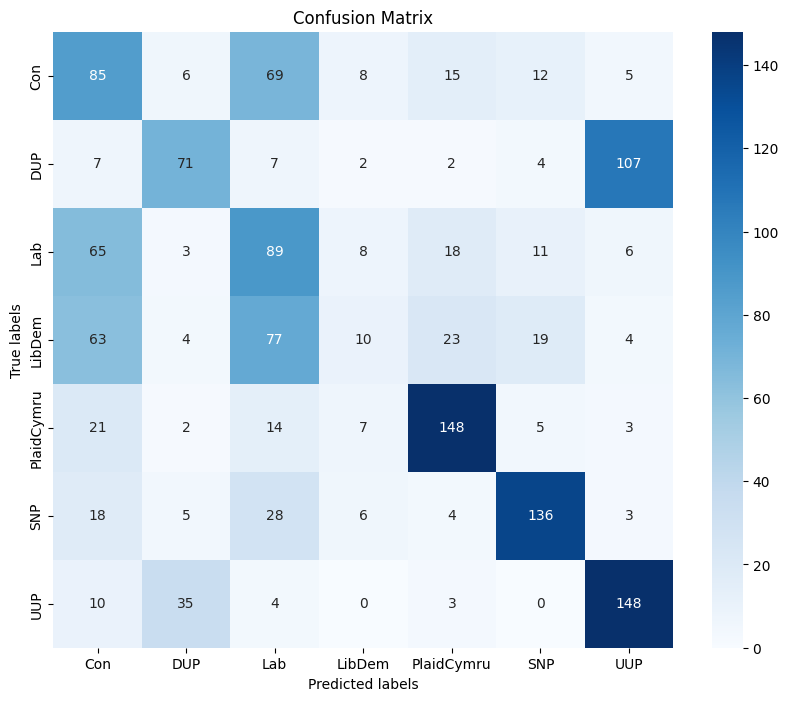

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = model_12.predict(X_test_pad)
predictions_classes = np.argmax(predictions, axis=1)
labels = ["Con", "DUP", "Lab", "LibDem", "PlaidCymru", "SNP", "UUP"]
predictions_labels = [labels[label] for label in predictions_classes]

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions_labels)

# Plot confusion matrix

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model_13 = Sequential()
model_13.add(Input(shape=(max_len, embedding_dim)))
model_13.add(Masking())
model_13.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model_13.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model_13.add(Dense(units=64, activation='relu', kernel_regularizer=l2(l2_reg)))
model_13.add(Dropout(0.2))
model_13.add(Dense(units=32, activation='relu', kernel_regularizer=l2(l2_reg)))
model_13.add(Dropout(0.2))
model_13.add(Dense(units=7, activation='softmax'))

model_13.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit model_13
history_13 = model_13.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=100,
    validation_split=0.2,
    callbacks=[EarlyStopper_5],
    batch_size=32,
    shuffle=True,
    verbose=1
)

Epoch 1/100


2024-05-10 20:10:21.323180: E tensorflow/core/util/util.cc:131] oneDNN supports DT_BOOL only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


140/140 ━━━━━━━━━━━━━━━━━━━━ 51s 345ms/step - accuracy: 0.1574 - loss: 2.8353 - val_accuracy: 0.1580 - val_loss: 2.1527
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 55s 392ms/step - accuracy: 0.1793 - loss: 2.0585 - val_accuracy: 0.2009 - val_loss: 1.9176
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 55s 391ms/step - accuracy: 0.1990 - loss: 1.9259 - val_accuracy: 0.1464 - val_loss: 1.9679
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 57s 410ms/step - accuracy: 0.1632 - loss: 1.9585 - val_accuracy: 0.2089 - val_loss: 1.8844
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 61s 435ms/step - accuracy: 0.1701 - loss: 1.9321 - val_accuracy: 0.1312 - val_loss: 1.9517
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 62s 446ms/step - accuracy: 0.1451 - loss: 1.9493 - val_accuracy: 0.1973 - val_loss: 1.8992
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 62s 443ms/step - accuracy: 0.1403 - loss: 1.9591 - val_accuracy: 0.1402 - val_loss: 1.9493
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 64s 458ms/step - accuracy: 0.1388 - loss: 1.948

In [ ]:
model_14 = Sequential()
model_14.add(Input(shape=(max_len, embedding_dim)))
model_14.add(Masking())
model_14.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model_14.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model_14.add(Dense(units=64, activation='relu', kernel_regularizer=l2(l2_reg)))
model_14.add(Dropout(0.2))
model_14.add(Dense(units=32, activation='relu'))
model_14.add(Dropout(0.15))
model_14.add(Dense(units=7, activation='softmax'))

model_14.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit model_14
history_14 = model_14.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=100,
    validation_split=0.2,
    callbacks=[EarlyStopper_5],
    batch_size=32,
    shuffle=True,
    verbose=1
)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 61s 392ms/step - accuracy: 0.1469 - loss: 2.5245 - val_accuracy: 0.1982 - val_loss: 2.0395
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 52s 371ms/step - accuracy: 0.1991 - loss: 1.9994 - val_accuracy: 0.2205 - val_loss: 1.8697
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 54s 385ms/step - accuracy: 0.1942 - loss: 1.8993 - val_accuracy: 0.1929 - val_loss: 1.8990
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 56s 402ms/step - accuracy: 0.2126 - loss: 1.8551 - val_accuracy: 0.2152 - val_loss: 1.8292
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 61s 434ms/step - accuracy: 0.2100 - loss: 1.8619 - val_accuracy: 0.1991 - val_loss: 1.8588
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 62s 442ms/step - accuracy: 0.2118 - loss: 1.8405 - val_accuracy: 0.1500 - val_loss: 1.9419
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 63s 449ms/step - accuracy: 0.1519 - loss: 1.9324 - val_accuracy: 0.1946 - val_loss: 1.9081
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 60s 425ms/step - accuracy: 0.1938 -

In [ ]:
model_15 = Sequential()
model_15.add(Input(shape=(max_len, embedding_dim)))
model_15.add(Masking())
model_15.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model_15.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model_15.add(Dense(units=128, activation='relu', kernel_regularizer=l2(l2_reg)))
model_15.add(Dropout(0.2))
model_15.add(Dense(units=7, activation='softmax'))

model_15.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit model_15
history_15 = model_15.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=100,
    validation_split=0.2,
    callbacks=[EarlyStopper_5],
    batch_size=32,
    shuffle=True,
    verbose=1
)

Epoch 1/100


2024-05-10 22:28:40.116980: E tensorflow/core/util/util.cc:131] oneDNN supports DT_BOOL only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


140/140 ━━━━━━━━━━━━━━━━━━━━ 49s 334ms/step - accuracy: 0.1598 - loss: 2.7700 - val_accuracy: 0.1937 - val_loss: 2.0298
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 50s 360ms/step - accuracy: 0.2085 - loss: 1.9801 - val_accuracy: 0.1786 - val_loss: 1.9544
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 50s 359ms/step - accuracy: 0.2133 - loss: 1.8904 - val_accuracy: 0.2491 - val_loss: 1.7981
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 52s 373ms/step - accuracy: 0.2330 - loss: 1.8536 - val_accuracy: 0.2330 - val_loss: 1.8350
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 55s 395ms/step - accuracy: 0.2220 - loss: 1.8506 - val_accuracy: 0.1321 - val_loss: 1.9546
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 55s 392ms/step - accuracy: 0.1866 - loss: 1.9008 - val_accuracy: 0.2634 - val_loss: 1.7375
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 55s 390ms/step - accuracy: 0.2699 - loss: 1.7294 - val_accuracy: 0.2732 - val_loss: 1.7005
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 55s 392ms/step - accuracy: 0.2824 - loss: 1.688

In [ ]:
test_loss_15, accuracy_15 = model_15.evaluate(X_test_pad, y_test_one_hot)
test_loss_15, accuracy_15

44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.5188 - loss: 1.1662


(1.1667630672454834, 0.5321428775787354)

In [ ]:
model_16 = Sequential()
model_16.add(Input(shape=(max_len, embedding_dim)))
model_16.add(Masking())
model_16.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model_16.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model_16.add(Dense(units=128, activation='relu', kernel_regularizer=l2(l2_reg)))
model_16.add(Dropout(0.25))
model_16.add(Dense(units=7, activation='softmax'))

model_16.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit model_16
history_16 = model_16.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=100,
    validation_split=0.2,
    callbacks=[EarlyStopper_5],
    batch_size=32,
    shuffle=True,
    verbose=1
)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 50s 338ms/step - accuracy: 0.1586 - loss: 2.7888 - val_accuracy: 0.1946 - val_loss: 2.0504
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 50s 355ms/step - accuracy: 0.1992 - loss: 1.9995 - val_accuracy: 0.2080 - val_loss: 1.8783
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 50s 359ms/step - accuracy: 0.2047 - loss: 1.9198 - val_accuracy: 0.1652 - val_loss: 1.9521
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 50s 358ms/step - accuracy: 0.1660 - loss: 1.9446 - val_accuracy: 0.1679 - val_loss: 1.9214
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 54s 384ms/step - accuracy: 0.1832 - loss: 1.9242 - val_accuracy: 0.2321 - val_loss: 1.8154
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 55s 391ms/step - accuracy: 0.2261 - loss: 1.8387 - val_accuracy: 0.2509 - val_loss: 1.7026
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 55s 392ms/step - accuracy: 0.2483 - loss: 1.7388 - val_accuracy: 0.2607 - val_loss: 1.6533
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 55s 391ms/step - accuracy: 0.2317 -

In [28]:
model_17 = Sequential()
model_17.add(Input(shape=(max_len, embedding_dim)))
model_17.add(Masking())
model_17.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model_17.add(Dense(units=128, activation='relu', kernel_regularizer=l2(l2_reg)))
model_17.add(Dropout(0.2))
model_17.add(Dense(units=7, activation='softmax'))

model_17.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
# Fit model_17
history_17 = model_17.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=100,
    validation_split=0.2,
    callbacks=[EarlyStopper_5],
    batch_size=32,
    shuffle=True,
    verbose=1
)

Epoch 1/100
140/140 [==============================] - 134s 934ms/step - loss: 2.4880 - accuracy: 0.1714 - val_loss: 2.1195 - val_accuracy: 0.1545
Epoch 2/100
140/140 [==============================] - 128s 916ms/step - loss: 2.0241 - accuracy: 0.1705 - val_loss: 1.9686 - val_accuracy: 0.2027
Epoch 3/100
140/140 [==============================] - 133s 950ms/step - loss: 1.9346 - accuracy: 0.1848 - val_loss: 1.9333 - val_accuracy: 0.1991
Epoch 4/100
140/140 [==============================] - 130s 930ms/step - loss: 1.8927 - accuracy: 0.2098 - val_loss: 1.8893 - val_accuracy: 0.2321
Epoch 5/100
140/140 [==============================] - 128s 914ms/step - loss: 1.9220 - accuracy: 0.1846 - val_loss: 1.9413 - val_accuracy: 0.1607
Epoch 6/100
140/140 [==============================] - 129s 926ms/step - loss: 1.9190 - accuracy: 0.1891 - val_loss: 1.8870 - val_accuracy: 0.2018
Epoch 7/100
140/140 [==============================] - 131s 934ms/step - loss: 1.9422 - accuracy: 0.1647 - val_loss: 1

KeyboardInterrupt: 

In [30]:
model_18 = Sequential()
model_18.add(Input(shape=(max_len, embedding_dim)))
model_18.add(Masking())
model_18.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model_18.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model_18.add(Dense(units=64, activation='relu', kernel_regularizer=l2(l2_reg)))
model_18.add(Dropout(0.25))
model_18.add(Dense(units=7, activation='softmax'))

model_18.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit model_18
history_18 = model_18.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=100,
    validation_split=0.2,
    callbacks=[EarlyStopper_5],
    batch_size=32,
    shuffle=True,
    verbose=1
)

Epoch 1/100
140/140 [==============================] - 309s 2s/step - loss: 2.2943 - accuracy: 0.1877 - val_loss: 1.9912 - val_accuracy: 0.2071
Epoch 2/100
140/140 [==============================] - 308s 2s/step - loss: 1.9868 - accuracy: 0.1790 - val_loss: 2.0259 - val_accuracy: 0.1554
Epoch 3/100
140/140 [==============================] - 307s 2s/step - loss: 1.9529 - accuracy: 0.1643 - val_loss: 1.9605 - val_accuracy: 0.1661
Epoch 4/100
140/140 [==============================] - 311s 2s/step - loss: 1.8924 - accuracy: 0.1958 - val_loss: 1.8572 - val_accuracy: 0.2196
Epoch 5/100
140/140 [==============================] - 307s 2s/step - loss: 1.8623 - accuracy: 0.2185 - val_loss: 1.9081 - val_accuracy: 0.1455
Epoch 6/100
140/140 [==============================] - 305s 2s/step - loss: 1.8475 - accuracy: 0.2156 - val_loss: 1.7964 - val_accuracy: 0.2313
Epoch 7/100
140/140 [==============================] - 293s 2s/step - loss: 1.7960 - accuracy: 0.2509 - val_loss: 1.7891 - val_accuracy:

In [27]:
# Fit model_12 with optimizer rmsprop

model_12.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history_12_b = model_12.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=100,
    validation_split=0.2,
    callbacks=[EarlyStopper_5],
    batch_size=32,
    shuffle=True,
    verbose=1
)

Epoch 1/100
140/140 [==============================] - 247s 2s/step - loss: 2.2730 - accuracy: 0.1958 - val_loss: 2.0077 - val_accuracy: 0.2098
Epoch 2/100
140/140 [==============================] - 240s 2s/step - loss: 1.9455 - accuracy: 0.2239 - val_loss: 1.8543 - val_accuracy: 0.2688
Epoch 3/100
140/140 [==============================] - 240s 2s/step - loss: 1.8370 - accuracy: 0.2527 - val_loss: 1.8115 - val_accuracy: 0.2786
Epoch 4/100
140/140 [==============================] - 262s 2s/step - loss: 1.8122 - accuracy: 0.2598 - val_loss: 1.7938 - val_accuracy: 0.2384
Epoch 5/100
140/140 [==============================] - 262s 2s/step - loss: 1.8042 - accuracy: 0.2714 - val_loss: 1.7852 - val_accuracy: 0.2643
Epoch 6/100
140/140 [==============================] - 251s 2s/step - loss: 1.7481 - accuracy: 0.2960 - val_loss: 1.7051 - val_accuracy: 0.3134
Epoch 7/100
140/140 [==============================] - 248s 2s/step - loss: 1.7217 - accuracy: 0.3056 - val_loss: 1.6643 - val_accuracy: